# Use Case 6: Comparing Derived Molecular Data with Proteomics


For this use case, we will be looking at the derived molecular data contained in the Endometrial dataset, and comparing it with protein data.

## Step 1: Importing packages

We will start by importing the python packages we will need, including the CPTAC Endometrial data package, which includes the Endometrial patient data as well as accessory functions that we will use to analyze the data.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import CPTAC.Endometrial as en

## Step 2: Getting data and selecting attributes

For this use case, we will be using two dataframes contained in the Endometrial dataset: <code>derived_molecular</code> and <code>proteomics</code>. We will use the getter functions to store these dataframes in variables.

In [13]:
der_molecular = en.get_derived_molecular()
proteomics = en.get_proteomics()

The derived molecular dataframe contains many different attributes that we can choose from for analysis. To view a list of these attributes, we can print out the column names of the dataframe. To view the full list of column names without truncation, first use the command <code>pd.set_option('display.max_seq_items', None)</code>.


In [19]:
der_molecular.columns

Index(['Proteomics_TMT_batch', 'Proteomics_TMT_plex', 'Proteomics_TMT_channel',
       'Proteomics_Parent_Sample_IDs', 'Proteomics_Aliquot_ID',
       'Proteomics_OCT', 'Estrogen_Receptor', 'Estrogen_Receptor_%',
       'Progesterone_Receptor', 'Progesterone_Receptor_%',
       ...
       'RNAseq_R1_sample_type', 'RNAseq_R1_filename', 'RNAseq_R1_UUID',
       'RNAseq_R2_sample_type', 'RNAseq_R2_filename', 'RNAseq_R2_UUID',
       'miRNAseq_sample_type', 'miRNAseq_UUID', 'Methylation_available',
       'Methylation_quality'],
      dtype='object', length=144)

For our purposes, we are going to be comparing MSI status with the JAK1 protein. MSI stands for Microsatellite instability, and refers to an impairment in the system for correcting errors in DNA. The possible values for MSI status are MSI-H (high microsatellite instability) or MSS (microsatellite stable). To see all of the possible values in any column, you can use the pandas function <code>.unique()</code>

In [15]:
der_molecular['MSI_status'].unique()

array(['MSI-H', 'MSS', nan], dtype=object)

## Step 3: Merge dataframes

We will use the <code>en.compare_derived_molecular()</code> function to merge our desired molecular trait with the proteomics data.  

In [16]:
merged_data = en.compare_derived_molecular(proteomics, 'MSI_status')

## Step 4: Plot data

Now we will use the seaborn and matplotlib libraries to create a boxplot that will allow us to visualize this data. For more information on using seaborn, see <a href="https://seaborn.pydata.org/tutorial.html">seaborn tutorial</a>.

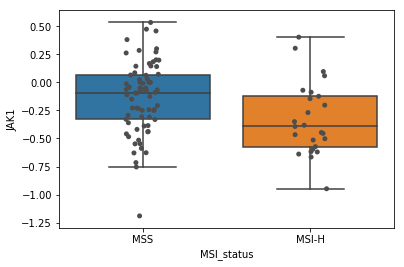

In [11]:
sns.boxplot(x='MSI_status', y='JAK1', data = merged_data, showfliers = False, order = ['MSS', 'MSI-H'])
sns.stripplot(x='MSI_status', y='JAK1', data = merged_data, color = '.3', order = ['MSS', 'MSI-H'])
plt.show()